In [2]:

# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt




In [3]:
# Load Titanic dataset (replace with your actual path)
file_path = "train.csv"   # <-- Update this path if needed
titanic = pd.read_csv(file_path)
print("Original Titanic Dataset Sample:\n")
print(titanic.head())


Original Titanic Dataset Sample:

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            3

In [4]:
######################################################
# 1. DATA CLEANING
######################################################
print("\n--- Handling Missing Values ---")

print("Missing values before:\n", titanic.isnull().sum())

# Fill missing Age with mean
imputer = SimpleImputer(strategy='mean')
titanic['Age'] = imputer.fit_transform(titanic[['Age']])

# Fill missing Cabin with "Unknown"
titanic['Cabin'] = titanic['Cabin'].fillna("Unknown")

# Fill missing Embarked with most frequent
##imputer_mode = SimpleImputer(strategy='most_frequent')
#titanic['Embarked'] = imputer_mode.fit_transform(titanic[['Embarked']])

print("Missing values after:\n", titanic.isnull().sum())



--- Handling Missing Values ---
Missing values before:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Missing values after:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64


In [5]:
######################################################
# 1a. REMOVING NOISE (Binning Example)
######################################################
print("\n--- Removing Noise using Binning ---")

# Example: Smooth Age values using binning (equal-width binning)
# Divide Age into 5 bins and replace with bin mean
bins = pd.cut(titanic['Age'], bins=5)
titanic['Age_BinMean'] = titanic.groupby(bins)['Age'].transform('mean')

print(titanic[['Age','Age_BinMean']].head(10))


--- Removing Noise using Binning ---
         Age  Age_BinMean
0  22.000000    26.256680
1  38.000000    39.239362
2  26.000000    26.256680
3  35.000000    39.239362
4  35.000000    39.239362
5  29.699118    26.256680
6  54.000000    54.847826
7   2.000000     8.006700
8  27.000000    26.256680
9  14.000000     8.006700


/var/folders/ml/9lq4ld051f5fszn2k_cpc6yh0000gn/T/ipykernel_1323/3174227645.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic['Age_BinMean'] = titanic.groupby(bins)['Age'].transform('mean')


In [6]:
######################################################
# 2. DATA INTEGRATION (example demonstration)
######################################################
print("\n--- Data Integration ---")

# Suppose we had another dataset with passenger countries
country_data = pd.DataFrame({
    'PassengerId': [1,2,3,4,5],
    'Country': ["USA","UK","Finland","France","USA"]
})

# Merge Titanic with country_data
merged = pd.merge(titanic, country_data, on='PassengerId', how='left')
print(merged[['PassengerId','Name','Country']].head())


--- Data Integration ---
   PassengerId                                               Name  Country
0            1                            Braund, Mr. Owen Harris      USA
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...       UK
2            3                             Heikkinen, Miss. Laina  Finland
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)   France
4            5                           Allen, Mr. William Henry      USA


In [7]:
######################################################
# 3. DATA TRANSFORMATION
######################################################
print("\n--- Data Transformation ---")

# Encoding categorical variables
le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])  # male=1, female=0
titanic['Embarked'] = le.fit_transform(titanic['Embarked'])

# Normalization (Min-Max scaling for Fare)
scaler = MinMaxScaler()
titanic['Fare_MinMax'] = scaler.fit_transform(titanic[['Fare']])

# Standardization (Z-score scaling for Age)
std_scaler = StandardScaler()
titanic['Age_Standard'] = std_scaler.fit_transform(titanic[['Age']])

print(titanic[['Age','Age_BinMean','Age_Standard','Fare','Fare_MinMax']].head())


--- Data Transformation ---
    Age  Age_BinMean  Age_Standard     Fare  Fare_MinMax
0  22.0    26.256680     -0.592481   7.2500     0.014151
1  38.0    39.239362      0.638789  71.2833     0.139136
2  26.0    26.256680     -0.284663   7.9250     0.015469
3  35.0    39.239362      0.407926  53.1000     0.103644
4  35.0    39.239362      0.407926   8.0500     0.015713


In [8]:
######################################################
# 3a. DISCRETIZATION (Convert continuous -> categorical)
######################################################
print("\n--- Discretization of Age ---")

# Define bins for Age into categories: Child, Teen, Adult, Senior
titanic['Age_Group'] = pd.cut(titanic['Age'], bins=[0,12,18,50,100], labels=["Child","Teen","Adult","Senior"])

print(titanic[['Age','Age_Group']].head(15))


--- Discretization of Age ---
          Age Age_Group
0   22.000000     Adult
1   38.000000     Adult
2   26.000000     Adult
3   35.000000     Adult
4   35.000000     Adult
5   29.699118     Adult
6   54.000000    Senior
7    2.000000     Child
8   27.000000     Adult
9   14.000000      Teen
10   4.000000     Child
11  58.000000    Senior
12  20.000000     Adult
13  39.000000     Adult
14  14.000000      Teen


In [9]:
######################################################
# 4. DATA REDUCTION
######################################################
print("\n--- Data Reduction ---")

# Feature selection: drop Ticket & Name (not useful for ML)
reduced = titanic.drop(['Ticket','Name'], axis=1)

# Sampling (take a subset of rows)
sample = titanic.sample(5, random_state=42)

print("Reduced dataset shape:", reduced.shape)
print("Sample dataset:\n", sample)



--- Data Reduction ---
Reduced dataset shape: (891, 14)
Sample dataset:
      PassengerId  Survived  Pclass  \
709          710         1       3   
439          440         0       2   
840          841         0       3   
720          721         1       2   
39            40         1       3   

                                                  Name  Sex        Age  SibSp  \
709  Moubarek, Master. Halim Gonios ("William George")    1  29.699118      1   
439             Kvillner, Mr. Johan Henrik Johannesson    1  31.000000      0   
840                        Alhomaki, Mr. Ilmari Rudolf    1  20.000000      0   
720                  Harper, Miss. Annie Jessie "Nina"    0   6.000000      0   
39                         Nicola-Yarred, Miss. Jamila    0  14.000000      1   

     Parch            Ticket     Fare    Cabin  Embarked  Age_BinMean  \
709      1              2661  15.2458  Unknown         0     26.25668   
439      0        C.A. 18723  10.5000  Unknown         2     26.


--- Correlation Analysis ---
Survived        1.000000
Fare            0.257307
Fare_MinMax     0.257307
Parch           0.081629
PassengerId    -0.005007
SibSp          -0.035322
Age_BinMean    -0.055649
Age            -0.069809
Age_Standard   -0.069809
Embarked       -0.163517
Pclass         -0.338481
Sex            -0.543351
Name: Survived, dtype: float64


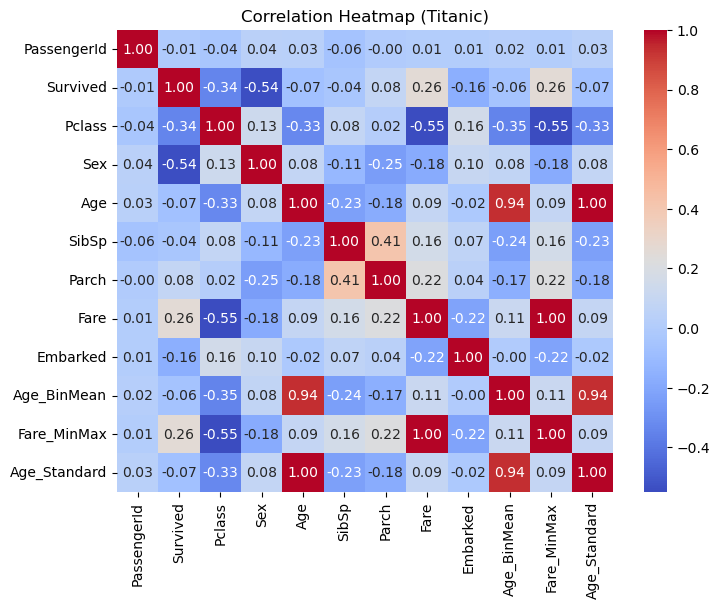

In [10]:
######################################################
# 5. CORRELATION ANALYSIS
######################################################
print("\n--- Correlation Analysis ---")

# Compute correlation between numerical features
corr = titanic.corr(numeric_only=True)
print(corr['Survived'].sort_values(ascending=False))

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Titanic)")
plt.show()

In [11]:
######################################################
# Summary
######################################################
print("\nPreprocessing Steps Completed:")
print("1. Cleaned missing values")
print("1a. Reduced noise using binning")
print("2. Integrated with external dataset")
print("3. Transformed categorical + numerical features")
print("4. Reduced dimensions and sampled data")
print("5. Performed correlation analysis")



Preprocessing Steps Completed:
1. Cleaned missing values
1a. Reduced noise using binning
2. Integrated with external dataset
3. Transformed categorical + numerical features
4. Reduced dimensions and sampled data
5. Performed correlation analysis


In [12]:
######################################################
# 6. AUTOMATED DATA PROFILING (ydata-profiling)
######################################################
!pip install ydata-profiling
# For automated profiling
from ydata_profiling import ProfileReport
print("\n--- Automated EDA with ydata-profiling ---")

profile = ProfileReport(titanic, title="Titanic Data Profiling Report", explorative=True)
profile.to_file("titanic_profile_report.html")
print("Profiling report saved as 'titanic_profile_report.html'")


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 665.7/665.7 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 1.5 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=8e00a98229792de1f789caccf50800776422326483b933da35f89b8fb6858ffd
  Stored in directory: /Users/nipunjuneja/Library/Caches/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found


--- Automated EDA with ydata-profiling ---


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 315065.09it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report saved as 'titanic_profile_report.html'
